**Проект Яндекс.Практикума. Анализ бизнес-показателей**

**Курс: Аналитик данных**

---



**СОДЕРЖАНИЕ**

---
[**Описание проекта**](#description)

[**Импорт библиотек и загрузка данных**](#loading)

[**Предобработка данных**](#preparing)

[**Расчет метрик**](#metrics)

[**Выводы и рекомендации**](#summary)

---




## **Описание проекта**<a  class="anchor" id="description"></a>



---



---



##  **Импорт библиотек и загрузка данных**<a  class="anchor" id="loading"></a>

In [1]:
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Функция для загрузки файлов с гугл-диска
def gdisk_gownload(link):
    url='https://drive.google.com/uc?id=' + link.split('/')[-2]
    return pd.read_csv(url)

In [3]:
try:
    visits=pd.read_csv(' ')
    orders=pd.read_csv(' ')
    costs=pd.read_csv(' ')
except:
    visits=gdisk_gownload('https://drive.google.com/file/d/ /view?usp=sharing')
    orders=gdisk_gownload('https://drive.google.com/file/d/ /view?usp=sharing')
    costs=gdisk_gownload('https://drive.google.com/file/d/ /view?usp=sharing')

In [4]:
# устанавливаем параметры отображения данных
pd.set_option("precision", 2)
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_colwidth', 40)
pd.set_option('display.width', 120)

sns.set(style="whitegrid")



---



---


## **Предобработка данных**<a  class="anchor" id="preparing"></a>

In [5]:
# функция для проверки датасета
def check_dataset(dataset):
    try:
        print('\033[1m','Случайные 5 строк таблицы:','\033[0m')
        print(dataset.sample(n=5,random_state=43))
        print('\033[1m','\nИнформация о типах данных:', '\033[0m')
        dataset.info()
        print('\033[1m', '\nДоля пропусков в столбцах:', '\033[0m')
        print(pd.DataFrame(round((dataset.isna().mean()*100),2)))
        print('\033[1m', '\nКоличество дубликатов:', '\033[0m',dataset.duplicated().sum())
            
    except:
        print('Ошибка')

In [6]:
check_dataset(visits)

 Случайные 5 строк таблицы: 
         Device               End Ts  Source Id             Start Ts                   Uid
85676     touch  2017-11-30 21:26:00          5  2017-11-30 21:16:00  10946033543292146036
355461  desktop  2018-01-03 10:31:00          4  2018-01-03 10:28:00   5680020010991135513
228613  desktop  2018-04-23 20:03:00          5  2018-04-23 20:02:00    600665701630077589
176491  desktop  2018-01-27 14:28:00          2  2018-01-27 14:17:00  12869801667763685675
232832  desktop  2018-03-18 22:46:00          5  2018-03-18 22:10:00  10189224185824968220
 
Информация о типах данных: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtype

Таблица о посещениях сайта содержит 359 400 уникальных полных записей по пяти полям, имена которых имеют не общепринятый формат написания, и не все их типы соотвествуют описанию данных.

Переименуем столбцы таблицы "Визиты" и приведем их порядок в соотвествии с описанием данных.

In [7]:
visits.columns=['device','end_ts','source_id','start_ts','uid']
visits=visits[['uid','device','start_ts','end_ts','source_id']]

Приведем столбцы даты и времени начала и окончания сессии к формату datetime. 

In [8]:
visits['start_ts']=pd.to_datetime(visits['start_ts'])
visits['end_ts']=pd.to_datetime(visits['end_ts'])



---



In [9]:
check_dataset(orders)

 Случайные 5 строк таблицы: 
                    Buy Ts  Revenue                   Uid
47664  2018-05-17 13:56:00     0.12   9319025516962480427
22079  2017-12-05 14:18:00     1.34   9019681082555518724
49565  2018-05-29 21:26:00     0.98   9370872760449470417
9427   2017-09-28 11:23:00     9.78  18304746974697862628
20964  2017-11-29 17:20:00     0.00   8277558335454815700
 
Информация о типах данных: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
 
Доля пропусков в столбцах: 
           0
Buy Ts   0.0
Revenue  0.0
Uid      0.0
 
Количество дубликатов:  0


Таблица о заказах содержит 50 415 уникальных полных записей по трем полям, имена которых имеют не общепринятый формат написания. Столбец с датой и временем заказа требует приведения типа данных.

Переименуем столбцы таблицы "Заказы" и приведем их порядок в соотвествии с описанием данных.

In [10]:
orders.columns=['buy_ts','revenue','uid']
orders=orders[['uid','buy_ts','revenue']]

Приведем столбец даты и времени заказа к формату datetime.

In [11]:
orders['buy_ts']=pd.to_datetime(orders['buy_ts'])



---



In [12]:
check_dataset(costs)

 Случайные 5 строк таблицы: 
      source_id          dt  costs
1786          5  2018-05-02  65.10
685           2  2018-04-21  77.12
2014          9  2017-12-16  20.42
371           2  2017-06-09  83.96
678           2  2018-04-14  71.49
 
Информация о типах данных: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
 
Доля пропусков в столбцах: 
             0
source_id  0.0
dt         0.0
costs      0.0
 
Количество дубликатов:  0


Таблица с информацией расходов на маркетинг не содержит пропусков и дубликатов.

Приведем столбец даты проведения рекламной компании к формату datetime.

In [13]:
costs['dt']=pd.to_datetime(costs['dt'])

In [14]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08




---



## **Рассчет метрик** <a class="anchor" id="metrics"></a>

### **Продуктовые метрики**

Для расчета продуктовых метрик добавим в таблицу visits столбцы, содержащие данные о годе, месяце, неделе и дате пользовательской сессии.

In [15]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

In [16]:
visits.head()

,uid,device,start_ts,end_ts,source_id,session_year,session_month,session_week,session_date
0,16879256277535980062,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,4,2017,12,51,2017-12-20
1,104060357244891740,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,2,2018,2,8,2018-02-19
2,7459035603376831527,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,5,2017,7,26,2017-07-01
3,16174680259334210214,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,9,2018,5,20,2018-05-20
4,9969694820036681168,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,3,2017,12,52,2017-12-27


Рассчитаем количество уникальных пользователей Яндекс.Афиши в день.

In [17]:
dau=visits.groupby('session_date').agg({'uid': 'nunique'})
dau_total = dau.mean()
print(f'Среднее количество уникальных пользователей Яндекс.Афиши в день составляет: {int(dau_total)} человек.')

Среднее количество уникальных пользователей Яндекс.Афиши в день составляет: 907 человек.


In [18]:
dau[dau['uid']==dau['uid'].max()]

,uid
session_date,
2017-11-24,3319


Постоим график изменения daily active users.

In [19]:
def metrics_plot(data,title,ylabel,xlabel='',xticklabels=[]):
    fig, ax = plt.subplots(figsize=(25, 8))
    ax.plot(data,linewidth=2)
    ax.title.set_text(title)
    ax.title.set_fontsize(20)
    ax.title.set_color('red')
    if len(xticklabels)!=0:
        ax.set_xticklabels(xticklabels)
    if xlabel!='':
        ax.set_xlabel(xlabel,fontsize=14)
    ax.set_ylabel(ylabel,fontsize=14)
    ax.set_facecolor('azure')
    ax.grid()
    plt.show()

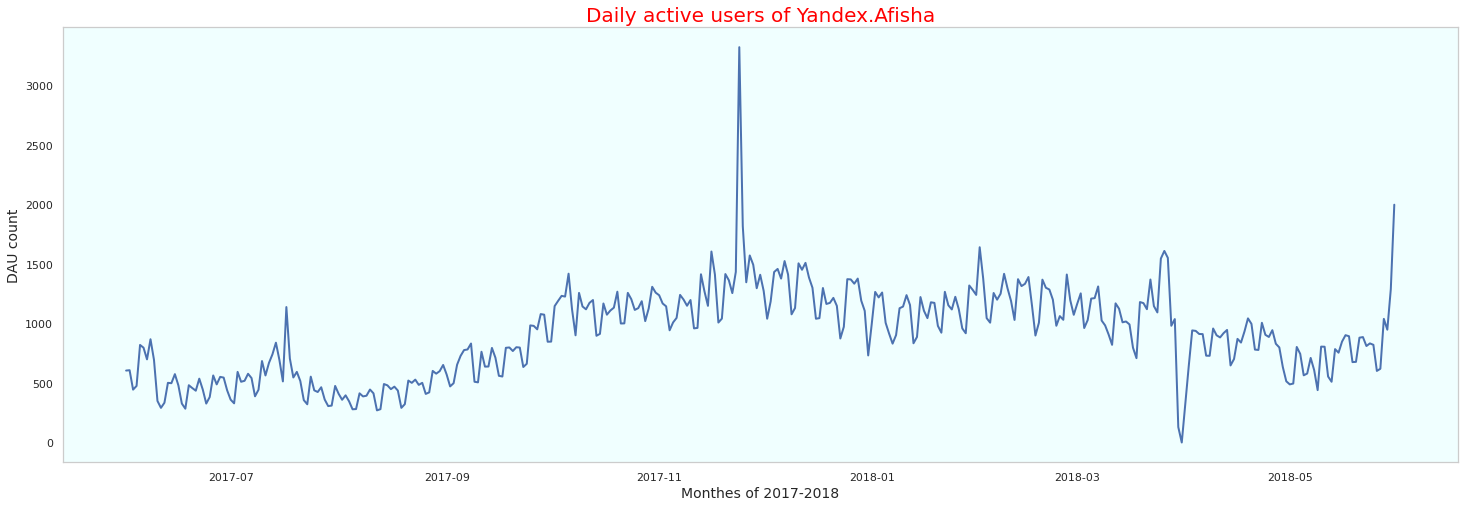

In [20]:
data=dau
title='Daily active users of Yandex.Afisha'
ylabel='DAU count'
xlabel='Monthes of 2017-2018'
metrics_plot(data,title,ylabel,xlabel)

Регистрируем всплеск активности пользователей 24.11.2017 совпадающий со стартом BlackFriday на Яндекс.Афише.

Рассчитаем количество уникальных пользователей Яндекс.Афиши в неделю.

In [21]:
wau=visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
wau_total = wau.mean()
print(f'Среднее количество уникальных пользователей Яндекс.Афиши в неделю составляет: {int(wau_total)} человек.')

Среднее количество уникальных пользователей Яндекс.Афиши в неделю составляет: 5716 человек.


Постоим график изменения weekly active users.

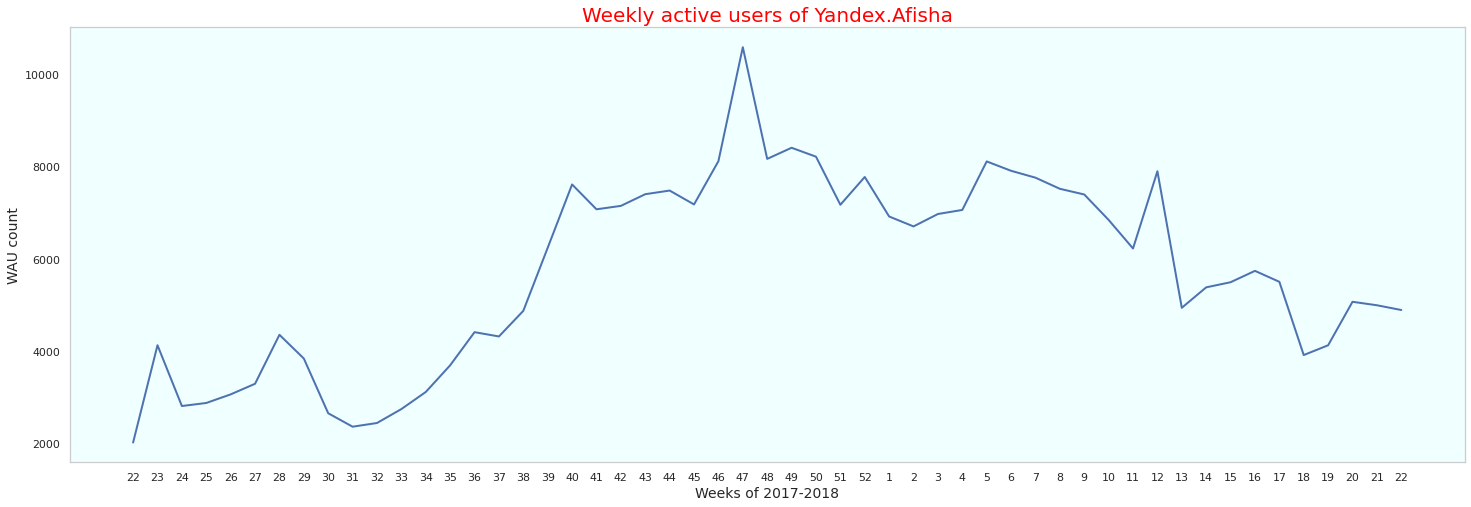

In [22]:
data=wau.reset_index()
title='Weekly active users of Yandex.Afisha'
ylabel='WAU count'
xtickslabel=data['session_week']
xlabel='Weeks of 2017-2018'
fig, ax = plt.subplots(figsize=(25, 8))
ax.plot(data['uid'],linewidth=2)
plt.xticks(range(len(xtickslabel)),xtickslabel)
ax.title.set_text(title)
ax.title.set_fontsize(20)
ax.title.set_color('red')
ax.set_ylabel(ylabel,fontsize=14)
ax.set_xlabel(xlabel,fontsize=14)
ax.set_facecolor('azure')
ax.grid()
plt.show()

Рассчитаем количество уникальных пользователей Яндекс.Афиши в месяц.

In [23]:
mau=visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
mau_total = mau.mean()
print(f'Среднее количество уникальных пользователей Яндекс.Афиши в месяц составляет: {int(mau_total)} человек.')

Среднее количество уникальных пользователей Яндекс.Афиши в месяц составляет: 23228 человек.


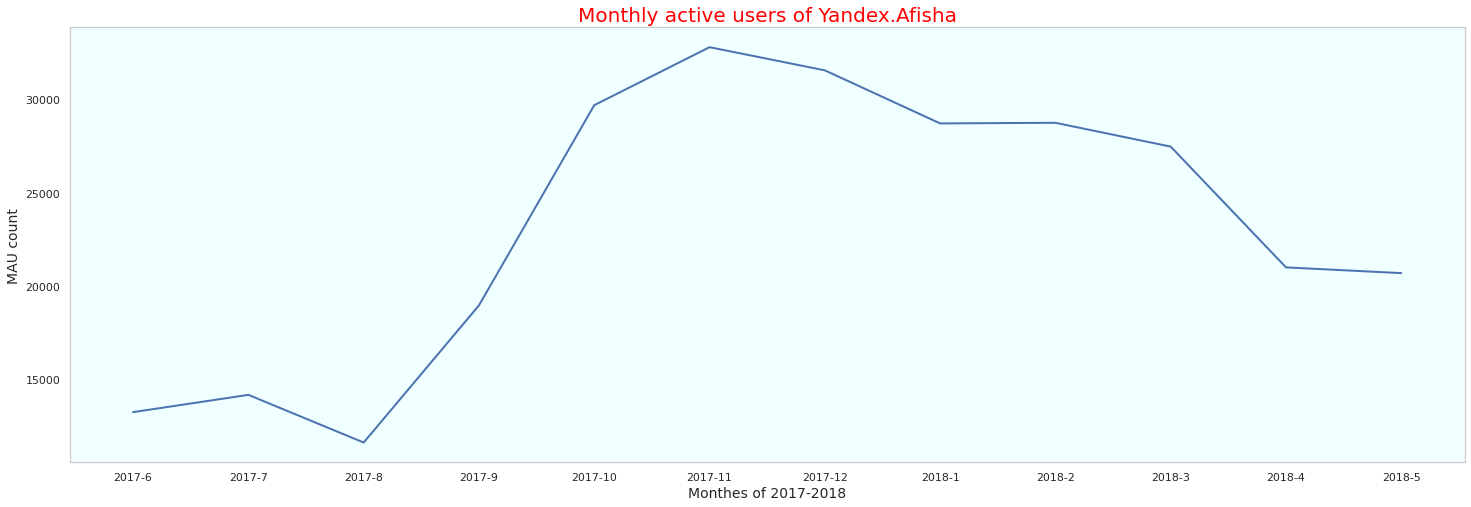

In [24]:
data=mau.reset_index()
data['year-month']=data['session_year'].astype(str) +'-'+ data['session_month'].astype(str)
data=data.set_index('year-month')
title='Monthly active users of Yandex.Afisha'
ylabel='MAU count'
xtickslabel=data.index
xlabel='Monthes of 2017-2018'
metrics_plot(data['uid'],title,ylabel,xlabel,xtickslabel)



---



Для определения количества визитов в день, приходящихся на одного пользователя, сгруппируем таблицу visits  по полям uid и session_date, рассчитаем количество сессий.

In [25]:
sessions_per_day=visits.groupby(['uid','session_date']).agg({'start_ts':'count'}).reset_index()
sessions_per_day.start_ts.describe()

count    330509.00
mean          1.09
std           0.37
min           1.00
25%           1.00
50%           1.00
75%           1.00
max          10.00
Name: start_ts, dtype: float64

В среднем на одного пользователя приходится одно посещение сайта Яндекс.Афиша в день. Отобразим распределение количества визитов на гистограмме и его динамику на графике.

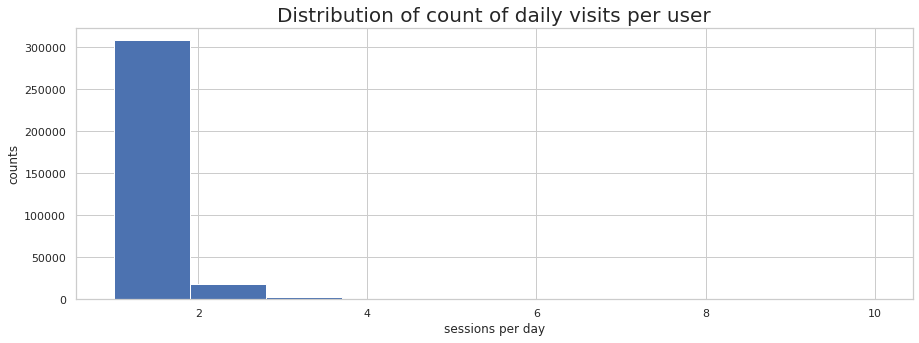

In [26]:
plt.figure(figsize=(15, 5))
plt.hist(sessions_per_day.start_ts,bins=10)
plt.title('Distribution of count of daily visits per user',fontsize=20)
plt.xlabel('sessions per day')
plt.ylabel('counts')
plt.show();

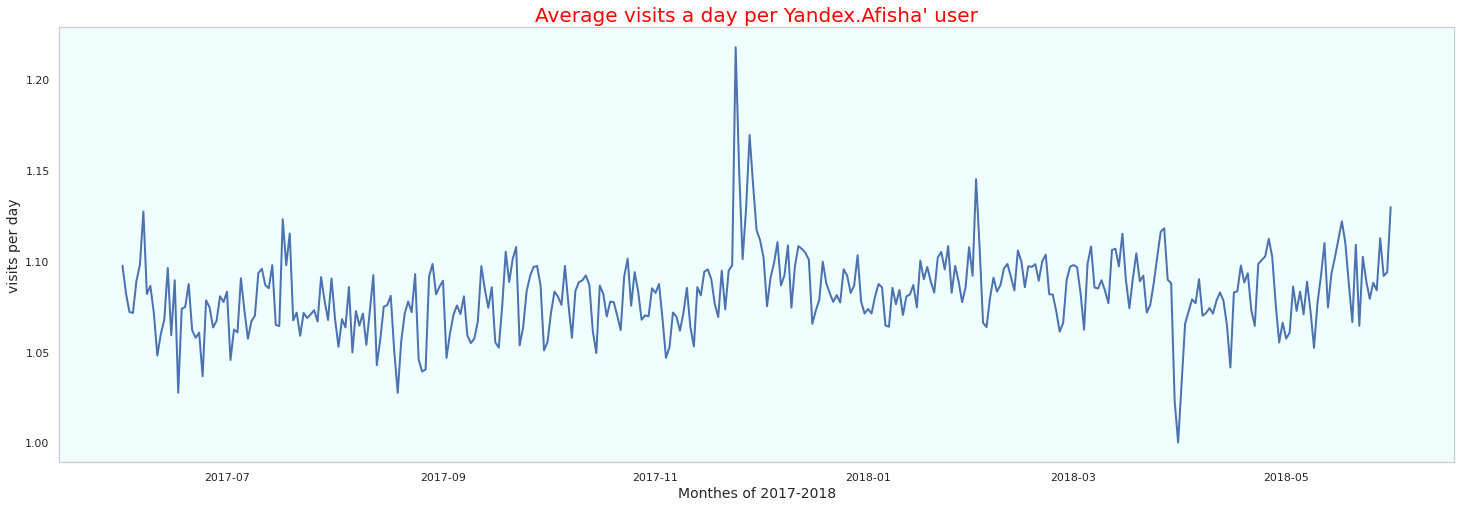

In [27]:
data=sessions_per_day.groupby('session_date').agg({'start_ts':'mean'})
title="Average visits a day per Yandex.Afisha' user"
xlabel='Monthes of 2017-2018'
ylabel='visits per day'
metrics_plot(data['start_ts'],title,ylabel,xlabel)



---




На поиск и изучение информации о мероприятии, выбор и оплату заказа средний пользователь Яндекс.Афиши тратит около 10 минут, причем половина посетителей сайта затрачивают на это только 5 минут.

In [28]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [29]:
visits.session_duration_sec.describe()

count    359400.00
mean        643.51
std        1016.33
min           0.00
25%         120.00
50%         300.00
75%         840.00
max       84480.00
Name: session_duration_sec, dtype: float64

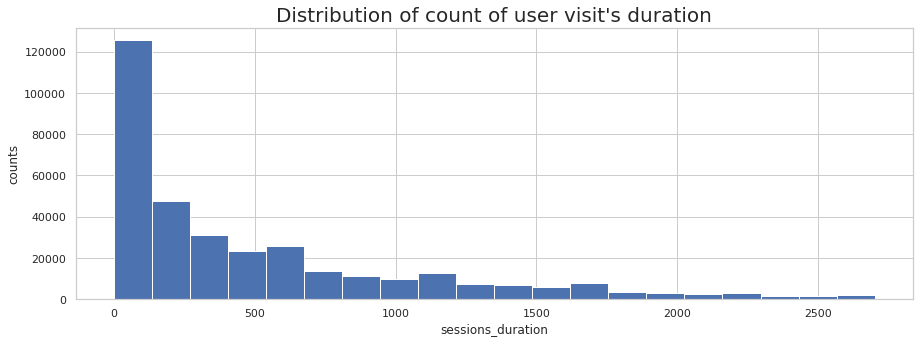

In [30]:
plt.figure(figsize=(15, 5))
plt.hist(visits.session_duration_sec,range=(0,2700),bins=20)
plt.title("Distribution of count of user visit's duration",fontsize=20)
plt.xlabel('sessions_duration')
plt.ylabel('counts')
plt.show();



---



Cформируем когорты на основе месяца первого визита пользователя на сайт Яндекс.Афиша.
Эти данные запишем в объект Series first_visit_date. Объединим его с исходным датафреймом visits:

In [31]:
first_visit_date = visits.groupby(['uid'])['start_ts'].min()
first_visit_date.name = 'first_visit_date'
visits = visits.join(first_visit_date,on='uid')

Для каждой строки датафрейма рассчитаем lifetime пользователя в рамках когорты.

In [32]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['cohort_lifetime'] = (visits['session_month'] - visits['first_visit_month'])
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')
visits.head()

,uid,device,start_ts,end_ts,source_id,session_year,session_month,session_week,session_date,session_duration_sec,first_visit_date,first_visit_month,cohort_lifetime
0,16879256277535980062,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,4,2017,2017-12-01,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,0
1,104060357244891740,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,2,2018,2018-02-01,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,0
2,7459035603376831527,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,5,2017,2017-07-01,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,0
3,16174680259334210214,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,9,2018,2018-05-01,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2
4,9969694820036681168,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,3,2017,2017-12-01,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,0


Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»:

In [33]:
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 

In [34]:
cohorts.head()

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


Найдём исходное количество пользователей в когорте: их число на нулевую неделю. Переименуем столбец uid в cohort_users.

In [35]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

Объединим данные по когортам с исходным количеством пользователей в когорте и рассчитаем Retention Rate:

In [36]:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [37]:
cohorts.head()

,first_visit_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.00
1,2017-06-01,1,1043,13259,0.08
2,2017-06-01,2,713,13259,0.05
3,2017-06-01,3,814,13259,0.06
4,2017-06-01,4,909,13259,0.07


Построим сводную таблицу и создадим тепловую карту:

In [38]:
retention_pivot = cohorts.pivot_table(
    index='first_visit_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) 

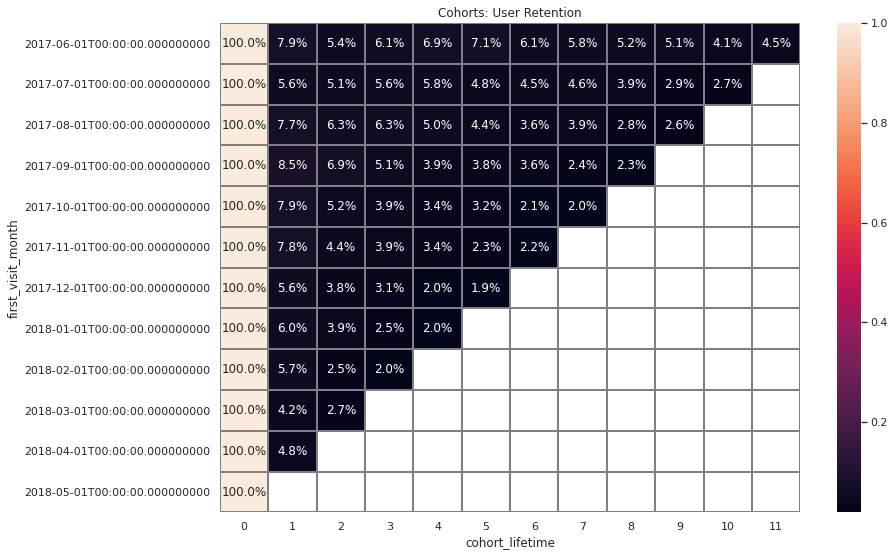

In [39]:
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 

In [40]:
print(f'Средний Retention Rate на второй месяц «жизни» когорт: {retention_pivot[2].mean():.2%}')

Средний Retention Rate на второй месяц «жизни» когорт: 4.63%


### **Метрики электронной коммерции**

Рассчитаем соотношение покупателей и посетителей сайта и конверсию визитов в заказы по данным за 12  месяцев

In [41]:
print(f'Соотношение покупателей и посетителей Яндекс.Афиши за 12 месяцев: {orders.uid.nunique()/visits.uid.nunique():.1%}')

Соотношение покупателей и посетителей Яндекс.Афиши за 12 месяцев: 16.0%


In [42]:
print(f'Конверсия визитов в заказы Яндекс.Афиши за 12 месяцев: {orders.buy_ts.count()/visits.start_ts.count():.1%}')

Конверсия визитов в заказы Яндекс.Афиши за 12 месяцев: 14.0%


Для исследования, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки, соединим по уникальному идентификатору пользователя таблицы визитов и заказов.

In [43]:
visits_orders=visits.merge(orders,how='inner',on='uid')
visits_orders=visits_orders[['uid','device','start_ts','end_ts','source_id','first_visit_date','buy_ts','revenue']]

Определим дату первого заказа покупателя и добавим ее в таблицу  visits_orders.

In [44]:
first_order_date = visits_orders.groupby(['uid'])['buy_ts'].min()
first_order_date.name = 'first_order_date'
visits_orders = visits_orders.join(first_order_date,on='uid') 

Для каждого пользователя определим промежуток времени от даты первой сессии до даты первого заказа в днях.

In [45]:
visits_orders['time_to_first_order']=(visits_orders['first_order_date']-visits_orders['first_visit_date'])/ np.timedelta64(1, 'D')

От половины покупателей первый заказ поступает в течение двух дней с даты первого захода на сайт.

In [46]:
visits_orders['time_to_first_order'].describe()

count    761807.00
mean         17.65
std          42.37
min           0.00
25%           0.01
50%           1.99
75%           8.88
max         363.29
Name: time_to_first_order, dtype: float64

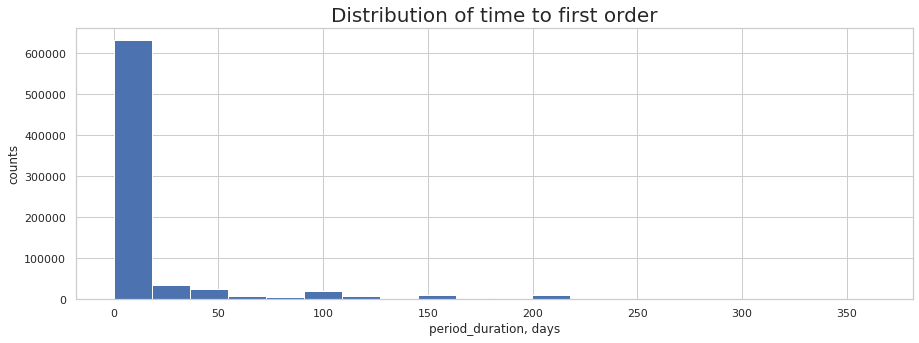

In [47]:
plt.figure(figsize=(15, 5))
plt.hist(visits_orders['time_to_first_order'],bins=20)
plt.title("Distribution of time to first order",fontsize=20)
plt.xlabel('period_duration, days')
plt.ylabel('counts')
plt.show();



---



Cформируем когорты на основе месяца первого заказа пользователя на сайте Яндекс.Афиша. Эти данные запишем в объект Series first_order_date. Объединим его с исходным датафреймом orders и для каждой строки рассчитаем lifetime пользователя в рамках когорты.:

In [48]:
first_order_date = orders.groupby(['uid'])['buy_ts'].min()
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date,on='uid') 
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month']= orders['buy_ts'].astype('datetime64[M]')
orders['cohort_lifetime'] = (orders['order_month'] - orders['first_order_month'])
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1, 'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].astype('int') 
orders.head()

,uid,buy_ts,revenue,first_order_date,first_order_month,order_month,cohort_lifetime
0,10329302124590727494,2017-06-01 00:10:00,17.00,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,11627257723692907447,2017-06-01 00:25:00,0.55,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,17903680561304213844,2017-06-01 00:27:00,0.37,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,16109239769442553005,2017-06-01 00:29:00,0.55,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,14200605875248379450,2017-06-01 07:58:00,0.37,2017-06-01 07:58:00,2017-06-01,2017-06-01,0


Выделим "долгосрочные" когорты - со сроком активности не менее 6 месяцев и сохраним их в переменной longtime_cohorts:

In [49]:
longtime_cohorts=orders.query('cohort_lifetime==6')['first_order_month'].unique()

In [50]:
revenue_6month_nbuyers=orders.query('first_order_month in @longtime_cohorts').groupby('first_order_month').agg({'uid':'nunique'})
revenue_6month_nbuyers.columns=['nbuyers']
revenue_6month_nbuyers

,nbuyers
first_order_month,
2017-06-01,2023
2017-07-01,1923
2017-08-01,1370
2017-09-01,2581
2017-10-01,4340


Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество заказов на определённый «месяц жизни».

In [51]:
revenue_6month_pivot = orders.query('first_order_month in @longtime_cohorts').pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue',
    aggfunc='count',
)
revenue_6month_pivot=revenue_6month_pivot.fillna(0).cumsum(axis=1)

In [52]:
revenue_6month_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10
first_order_month,,,,,,,,,,,
2017-06-01,2531.0,2531.0,2705.0,2931.0,3223.0,3441.0,3717.0,3891.0,4256.0,4352.0,4438.0
2017-07-01,2186.0,2286.0,2406.0,2510.0,2582.0,2664.0,2725.0,2833.0,2833.0,2910.0,2910.0
2017-08-01,1533.0,1641.0,1741.0,1822.0,1907.0,1969.0,2096.0,2142.0,2188.0,2188.0,2188.0
2017-09-01,3152.0,3152.0,3477.0,3477.0,3544.0,3761.0,3817.0,3878.0,3878.0,3878.0,3878.0
2017-10-01,4964.0,5278.0,5440.0,5562.0,5794.0,5880.0,6005.0,6005.0,6005.0,6005.0,6005.0


Добавим в таблицу данные о размере когорт и рассчитаем среднее количество заказов на покупателя каждой когорты на 5-6 месяц "жизни" на сервисе.

In [53]:
revenue_6month_pivot=revenue_6month_pivot.join(revenue_6month_nbuyers,on='first_order_month')
revenue_6month_pivot['orders_age_5']=revenue_6month_pivot[5]/revenue_6month_pivot.nbuyers
revenue_6month_pivot['orders_age_6']=revenue_6month_pivot[6]/revenue_6month_pivot.nbuyers

Рассчитаем  среднее количество покупок на одного покупателя за 6 месяцев. Так как для когорт существует нулевой месяц (месяц из формирования), за полугодовую отметку примем рубеж 5-6 lifetime.

In [54]:
orders_age_5=revenue_6month_pivot['orders_age_5'].mean()
orders_age_6=revenue_6month_pivot['orders_age_6'].mean()
print(f'Среднее количество заказов на одного пользователя за 6 месяцев: {orders_age_5:.2f} - {orders_age_6:.2f}')

Среднее количество заказов на одного пользователя за 6 месяцев: 1.47 - 1.53


Среднее количество заказов на одного покупателя за 6 месяцев составляет 1,5 покупки (вилка от 1,47-1,53).



---



Рассчитаем средний чек, применяя группировку по времени совершения покупки. 

In [55]:
rpo_pivot=orders.pivot_table(
    index='buy_ts',
    values='revenue',
    aggfunc=['count','sum']
).reset_index().droplevel(1, axis=1)

Чек покупателя равен частному от деления суммы покупок на их количество.

In [56]:
rpo_pivot['rpo']=rpo_pivot['sum']/rpo_pivot['count']

В ряду данных, описывающих покупки, присутствуют выбросы (максимум превышает 75%-квантиль в 538 раз, а стандартное отклонение больше среднего в 4,4 раза), а сумма характерная для 50% покупок составляет 2,69 у.е.
Исходя из того, что по определению средний чек — показатель эффективности продаж, рассчитываемый делением общей суммы совершённых покупок на их количество, для Яндекс.Афиши за 2017-2018 сумма среднего чека составила 4,99 у.е.


<div class="alert alert-info">Поправил.</div>

In [57]:
rpo_pivot['rpo'].describe()

count    45991.00
mean         4.99
std         22.16
min          0.00
25%          1.34
50%          2.69
75%          4.89
max       2633.28
Name: rpo, dtype: float64

Для визуализации изменения метрики во времени, сгруппируем данные о сумме единичной покупки к среднему чеку за день.

In [58]:
rpo_pivot['order_date'] = rpo_pivot['buy_ts'].dt.date
rpo_pivot_by_day=rpo_pivot.pivot_table(
    index='order_date',
    values='rpo',
    aggfunc='mean'
)

Построим график изменения среднедневного чека.

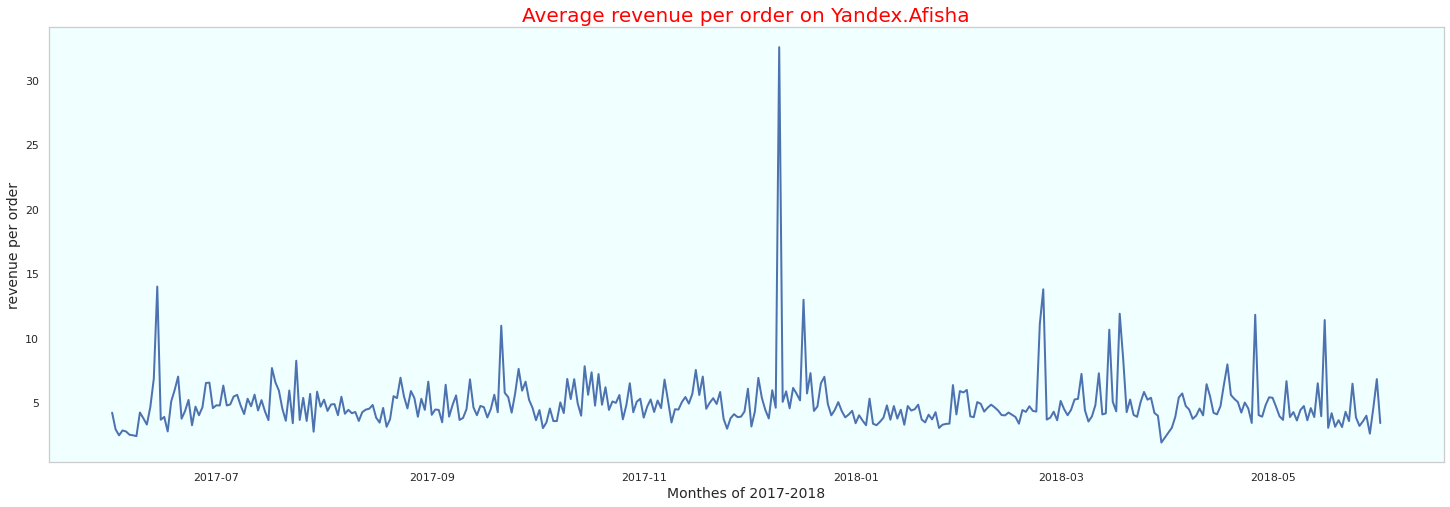

In [59]:
data=rpo_pivot_by_day
title="Average revenue per order on Yandex.Afisha"
xlabel='Monthes of 2017-2018'
ylabel='revenue per order'
metrics_plot(data,title,ylabel,xlabel)

На графике привлекает внимание всплеск суммы чека, приходящийся на "сезон корпоративов".



---



Для определения  lifetime value, рассчитаем вначале количество новых покупателей (n_buyers) за каждый месяц:

In [60]:
cohort_sizes = (
    orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']

Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и просуммируем выручку. 

In [61]:
cohorts = (
    orders.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц. Добавим в таблицу report столбец валовой прибыли (по условию равна выручке) и столбец "возраста" (age) когорты.

In [62]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report['gp'] = report['revenue']
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

Рассчитаем LTV: разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы (output):

In [63]:
report['ltv'] = report['gp'] / report['n_buyers']
output = (((report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)*100).round())/100).fillna(0)

In [64]:
output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,0.00
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,0.00,0.00
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65,0.70,0.24,0.18,0.00,0.00,0.00
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,0.00,0.00,0.00,0.00
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05,0.11,0.00,0.00,0.00,0.00,0.00
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,0.00,0.00,0.00,0.00,0.00,0.00
2018-01-01,4.14,0.29,0.30,0.14,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-02-01,4.16,0.28,0.08,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Ограничим сводную таблицу output когортами возрастом не менее полугода и данными по ним за 6 месяцев.

In [65]:
edge_month=pd.to_datetime('2017-11-01')

In [66]:
ltv_6month=output.query('first_order_month	<= @edge_month').cumsum(axis=1)
ltv_6month=ltv_6month[[0,1,2,3,4,5,6]]
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
ltv_6month.style.apply(highlight_max)

age,0,1,2,3,4,5,6
first_order_month,,,,,,,
2017-06-01 00:00:00,4.72,5.21,5.65,6.60,7.62,8.36,9.31
2017-07-01 00:00:00,6.01,6.35,6.97,7.33,7.51,7.67,7.79
2017-08-01 00:00:00,5.28,5.75,6.21,6.60,7.09,7.37,7.58
2017-09-01 00:00:00,5.64,6.76,7.28,11.26,11.66,12.31,13.01
2017-10-01 00:00:00,5.00,5.54,5.73,5.89,6.04,6.16,6.24
2017-11-01 00:00:00,5.15,5.55,5.75,6.07,6.22,6.27,6.38


Средний LTV по когортам за 6 месяцев:

In [67]:
ltv_6month[6].mean()

8.385

Для расчета среднего LTV за 6 месяцев, рассчитанного как среднее от частного куммулятивной выручки по когорте деленной на ее размер (v.2) и рассчитанного как частное от деления суммарной выручки по всем когортам за 6 месяцев на общую их численность (v.3), построим сводную таблицу и рассчитаем показатель  lifetime value.

In [68]:
output_gp = report.pivot_table(index='first_order_month', columns='age', values='gp', aggfunc='sum').fillna(0).cumsum(axis=1)
output_gp_6month=output_gp[[0,1,2,3,4,5,6]].merge(cohort_sizes, on='first_order_month').query('first_order_month	<= @edge_month') 
output_gp_6month['ltv']=round(output_gp_6month[6] / output_gp_6month['n_buyers'],2)
output_gp_6month

,first_order_month,0,1,2,3,4,5,6,n_buyers,ltv
0,2017-06-01,9557.49,10539.31,11424.65,13355.95,15424.53,16912.45,18835.19,2023,9.31
1,2017-07-01,11557.65,12202.26,13401.31,14091.62,14431.59,14731.67,14962.83,1923,7.78
2,2017-08-01,7228.83,7875.46,8503.58,9039.63,9716.48,10104.93,10393.54,1370,7.59
3,2017-09-01,14568.53,17453.02,18797.54,29059.06,30092.90,31762.98,33573.83,2581,13.01
4,2017-10-01,21716.20,24041.41,24872.06,25554.07,26211.84,26734.21,27102.31,4340,6.24
5,2017-11-01,21036.26,22665.53,23479.92,24806.05,25410.09,25629.97,26098.99,4081,6.40


In [69]:
print(f'Средний LTV (v.2) Яндекс.Афиши за 6 месяцев: {output_gp_6month.ltv.mean():.2f}')

Средний LTV (v.2) Яндекс.Афиши за 6 месяцев: 8.39


In [70]:
print(f'Средний LTV (v.3) Яндекс.Афиши за 6 месяцев: {output_gp_6month[6].sum()/output_gp_6month.n_buyers.sum():.2f}')

Средний LTV (v.3) Яндекс.Афиши за 6 месяцев: 8.03


Построим графики изменения метрики во времени.

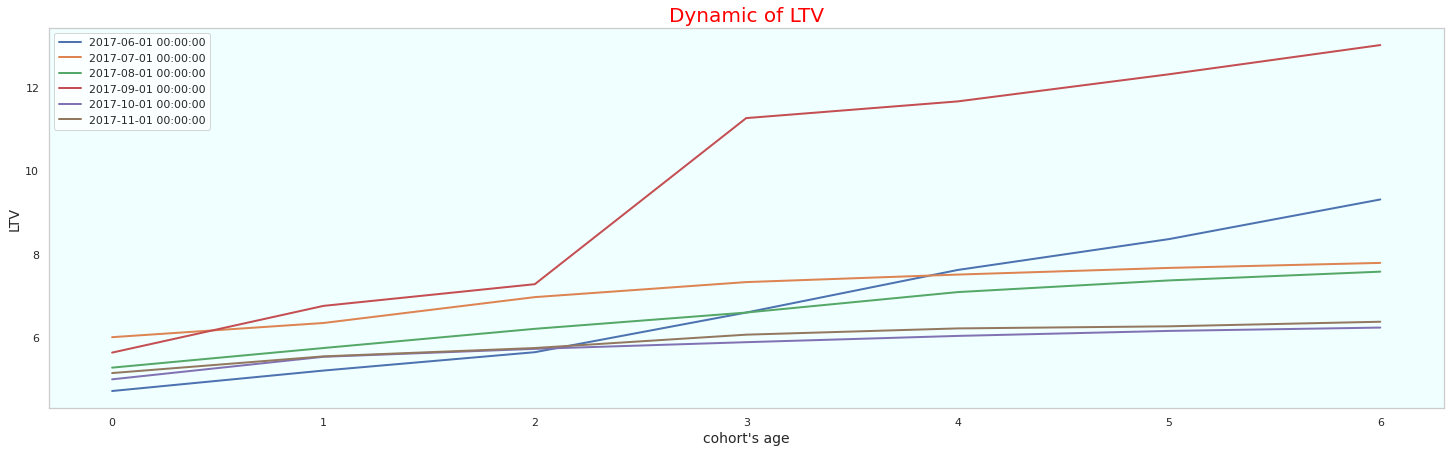

In [71]:
def ax_beautify(ax):
    ax.title.set_fontsize(20)
    ax.title.set_color('red')
    ax.legend(loc='upper left')
    ax.grid()
    ax.set_facecolor('azure')
fig, ax = plt.subplots(figsize=(25, 7))
ax.title.set_text('Dynamic of LTV')
for i in range(6):
    data=ltv_6month.iloc[i]
    ax.plot(data,linewidth=2,label=data.name)
ax.set_xticks(data.index)
ax.set_ylabel('LTV',fontsize=14)
ax.set_xlabel("cohort's age",fontsize=14)
ax_beautify(ax)

Можно предположить, что нетипичный средний чек в декабре 2017 пришелся на сентябрьскую когорту.



---



### **Маркетинговые метрики**

Рассчитаем общую сумму расходов на маркетинг.

In [72]:
costs_total=costs.costs.sum()
print(f'Общая сумма расходом на маркетинг за исследуемый период: {costs_total:.1f} у.е.')

Общая сумма расходом на маркетинг за исследуемый период: 329131.6 у.е.


Для определения того, как траты распределяются по источникам, сгруппируем данные о расходах по source_id и рассчитаем долю каждого источника в структуре затрат:

In [73]:
costs_by_source=costs.groupby('source_id').agg({'costs':'sum'}).sort_values(by='costs',ascending = False)
costs_by_source['costs_ratio']=round(costs_by_source.costs/costs_total*1000)/10
costs_by_source

,costs,costs_ratio
source_id,,
3,141321.63,42.9
4,61073.60,18.6
5,51757.10,15.7
2,42806.04,13.0
1,20833.27,6.3
10,5822.49,1.8
9,5517.49,1.7


Сравним как распределены по источникам визиты пользователей. Для этого сгруппируем таблицу visits по полю source_id, расчитаем общее количество визитов и их структуру по источникам.

In [74]:
visits_by_source=visits.groupby('source_id').agg({'start_ts':'count'}).sort_values(by='start_ts',ascending = False)

In [75]:
visits_total=visits.start_ts.count()
visits_by_source['visits_ratio']=round(visits_by_source.start_ts/visits_total*1000)/10

In [76]:
visits_by_source

,start_ts,visits_ratio
source_id,,
4,101794,28.3
3,85610,23.8
5,66905,18.6
2,47626,13.3
1,34121,9.5
9,13277,3.7
10,10025,2.8
7,36,0.0
6,6,0.0


Визуализируем структуры маркетинговых затрат и переходов по источникам на графике.

In [77]:
costs_by_source=costs_by_source.reset_index()
costs_by_source['source_id']=costs_by_source['source_id'].apply(str)


In [78]:
visits_by_source=visits_by_source.reset_index()
visits_by_source['source_id']=visits_by_source['source_id'].apply(str)

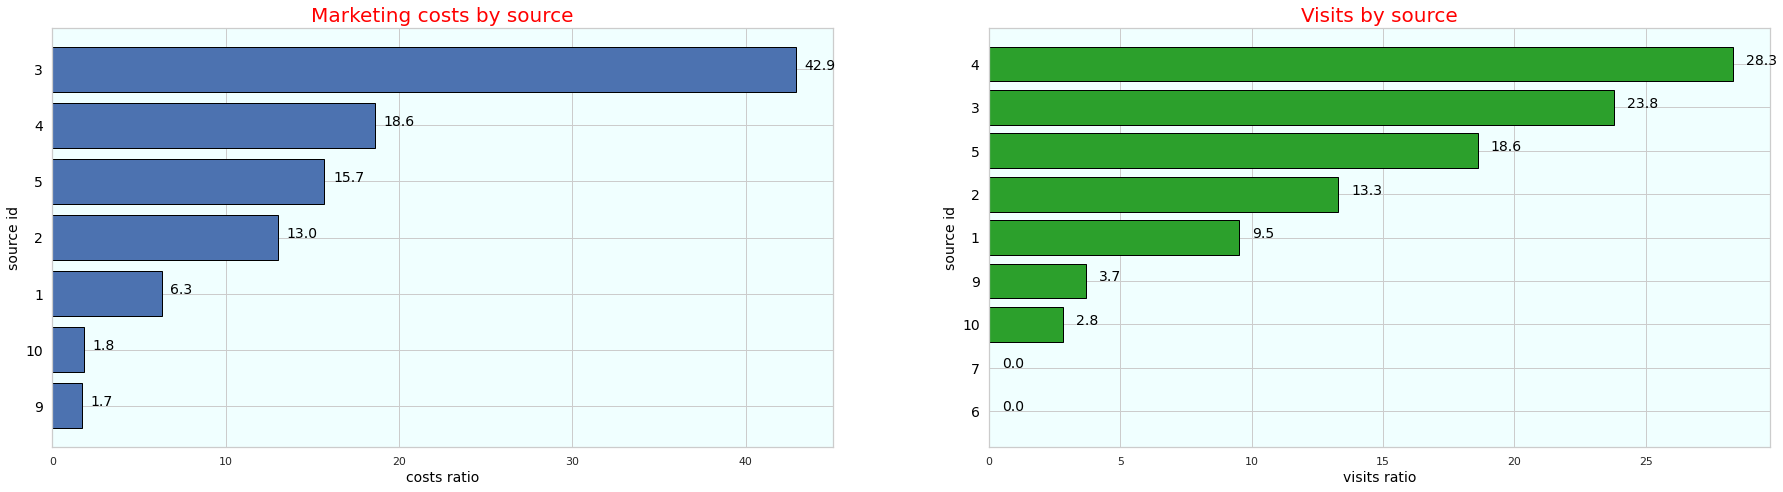

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(25, 7))
axes[0].barh(costs_by_source.source_id, costs_by_source.costs_ratio, align='center',ec='black')
axes[0].set_yticks(costs_by_source.source_id)
axes[0].set_yticklabels(costs_by_source.source_id, fontsize=14,color='black')
axes[0].invert_yaxis()
axes[0].set_ylabel('source id', fontsize=14,color='black')
axes[0].set_xlabel('costs ratio', fontsize=14,color='black')
axes[0].set_title('Marketing costs by source')
axes[0].title.set_fontsize(20)
axes[0].title.set_color('red')
for i, v in enumerate(costs_by_source.sort_index().costs_ratio):
    axes[0].text(v+0.5, i, format(v, '.1f'), fontsize=14,color='black')
axes[0].set_facecolor('azure')

axes[1].barh(visits_by_source.source_id, visits_by_source.visits_ratio, align='center',ec='black', color='tab:green')

axes[1].set_yticks(visits_by_source.source_id)
axes[1].set_yticklabels(visits_by_source.source_id, fontsize=14,color='black')
axes[1].invert_yaxis()
axes[1].set_ylabel('source id', fontsize=14,color='black')
axes[1].set_xlabel('visits ratio', fontsize=14,color='black')
axes[1].set_title('Visits by source')
axes[1].title.set_fontsize(20)
axes[1].title.set_color('red')
for i, v in enumerate(visits_by_source.sort_index().visits_ratio):
    axes[1].text(v+0.5, i,format(v, '.1f'), fontsize=14,color='black')
axes[1].set_facecolor('azure')
fig.tight_layout()
fig.subplots_adjust(wspace=0.2)
plt.show()

Построим график, отражающий динамику затрат на маркетинг Яндекс.Афиши по месяцам 2017-2018гг.

In [80]:
costs['costs_month']= costs['dt'].astype('datetime64[M]')
costs_dyn=costs.groupby('costs_month').agg({'costs':'sum'})

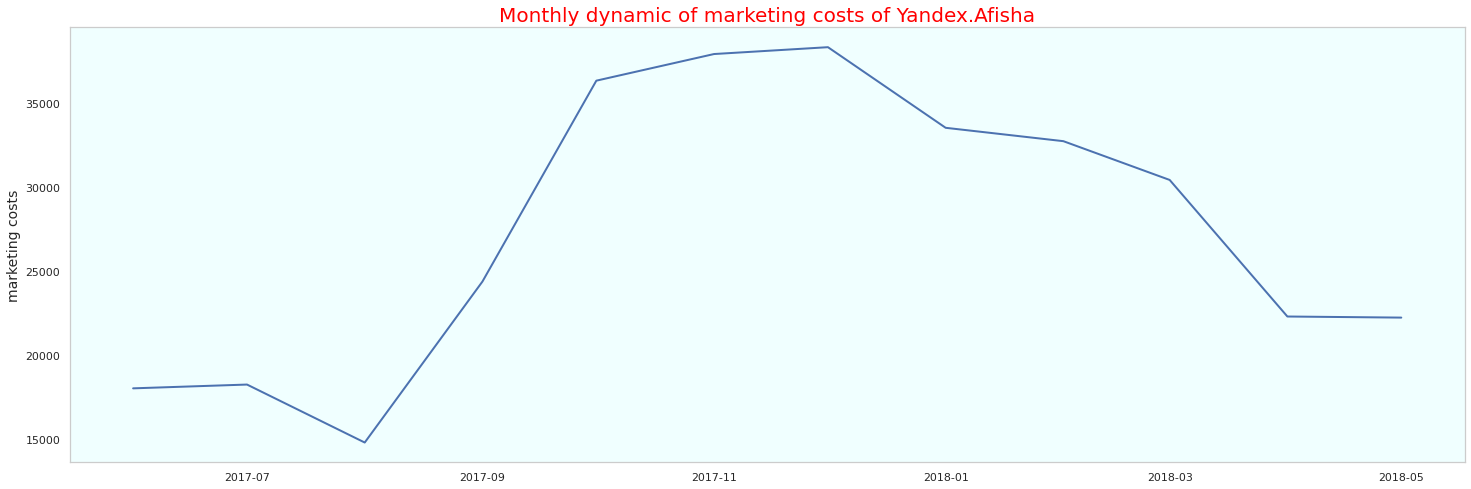

In [81]:
data=costs_dyn
title="Monthly dynamic of marketing costs of Yandex.Afisha"
ylabel='marketing costs'
metrics_plot(data,title,ylabel)

График демонстрирует, что, после пика расходов на маркетинг в осенне-зимный период, далее затраты снижаются.



---



Для расчета стоимости привлечения посетителя сервиса Яндекс.Афиша (customer acquisition cost) сгруппируем таблицы визитов пользователей и расходов на маркетинг по месяцу визита (определяем уникальных юзеров) и по месяцу расходов (определяем сумму расходов).

In [82]:
visits_new=visits[['uid','device','start_ts','source_id','session_month']]
first_visit_date = visits_new.groupby(['uid'])['start_ts'].min()
first_visit_date.name = 'first_visit_date'
visits_new = visits_new.join(first_visit_date,on='uid') 
visits_new['first_visit_month'] = visits_new['first_visit_date'].astype('datetime64[M]')
visits_by_month=visits_new.groupby('first_visit_month').agg({'uid':'nunique'}).reset_index()

In [83]:
costs_by_month=costs.groupby('costs_month').agg({'costs':'sum'}).reset_index()

Соединим таблицы visits_by_month и costs_by_month:

In [84]:
costs_visits = pd.merge(visits_by_month, costs_by_month, left_on='first_visit_month',right_on='costs_month')
costs_visits=costs_visits[['costs_month','uid','costs']]

Рассчитаем CAC как отношение затрат на маркетинг к количеству новых привлеченных пользователей.

In [85]:
costs_visits['cac']=costs_visits.costs/costs_visits.uid
costs_visits

,costs_month,uid,costs,cac
0,2017-06-01,13259,18015.00,1.36
1,2017-07-01,13140,18240.59,1.39
2,2017-08-01,10181,14790.54,1.45
3,2017-09-01,16704,24368.91,1.46
4,2017-10-01,25977,36322.88,1.40
5,2017-11-01,27248,37907.88,1.39
6,2017-12-01,25268,38315.35,1.52
7,2018-01-01,22624,33518.52,1.48
8,2018-02-01,22197,32723.03,1.47
9,2018-03-01,20589,30415.27,1.48


In [86]:
cac_mean=costs_visits.cac.mean()
print(f'Cредний CAC на одного покупателя для всего проекта: {cac_mean:.2f} у.е.')

Cредний CAC на одного покупателя для всего проекта: 1.44 у.е.


Построим график изменения стоимости привлечения покупателей.

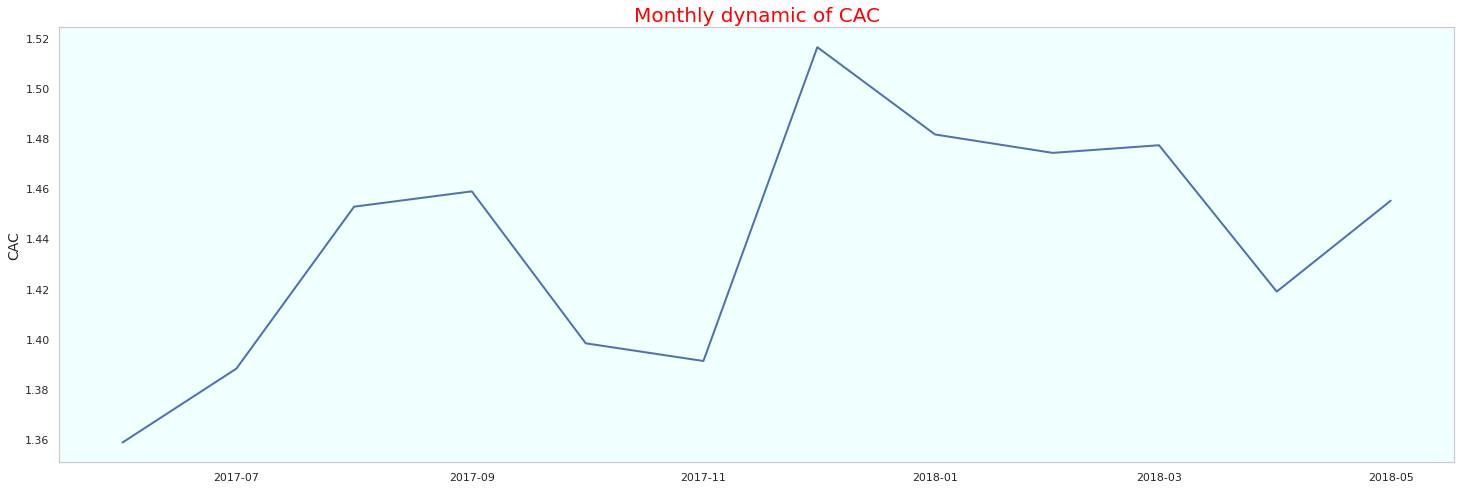

In [87]:
data=costs_visits.set_index('costs_month')
title="Monthly dynamic of CAC"
ylabel='CAC'
metrics_plot(data['cac'],title,ylabel)

В исследуемом периоде customer acquisition cost Яндекс.Афиши подвержен значительным колебаниям по "сезонам отдыха".


---



Для рассчета среднего CAC на одного покупателя для каждого источника трафика сгруппируем визиты (с расчетом количества уникальных пользователей) по полю source_id и соединим по нему с таблицей costs_by_source.

In [88]:
user_by_source=visits_new.groupby('source_id').agg({'uid':'nunique'}).reset_index()
costs_by_source['source_id']=costs_by_source['source_id'].astype('int64')
cac_by_source=costs_by_source.merge(user_by_source,how='outer',on='source_id').fillna(0)

Рассчитаем стоимость привлечения покупателей по источникам трафика:

In [89]:
cac_by_source['cac']=cac_by_source.costs/cac_by_source.uid
cac_by_source

,source_id,costs,costs_ratio,uid,cac
0,3,141321.63,42.9,74756,1.89
1,4,61073.60,18.6,83525,0.73
2,5,51757.10,15.7,56974,0.91
3,2,42806.04,13.0,26245,1.63
4,1,20833.27,6.3,18999,1.10
5,10,5822.49,1.8,8067,0.72
6,9,5517.49,1.7,9264,0.60
7,6,0.00,0.0,6,0.00
8,7,0.00,0.0,34,0.00


Для визуализации изменения метрики во времени проведем группировку данных о визитах и затратах на маркетинг по месяцу и источнику совершения.

In [90]:
costs_month_source=costs.groupby(['costs_month', 'source_id']).agg({'costs':'sum'})

In [91]:
visits_new.columns = ['uid','device','start_ts','source_id','costs_month','first_visit_date', 'first_visit_month']
visits_month_source=visits_new.groupby(['costs_month', 'source_id']).agg({'uid':'nunique'})

Объединим таблицы и рассчитаем CAC по месяцам для разных источников трафика.

In [92]:
cac_month_source=costs_month_source.join(visits_month_source,how='outer').fillna(0)
cac_month_source['cac']=cac_month_source.costs/cac_month_source.uid
cac_month_source.head()

costs   uid   cac
costs_month source_id                     
2017-06-01  1          1125.61   972  1.16
            2          2427.38  1532  1.58
            3          7731.65  4226  1.83
            4          3514.80  3636  0.97
            5          2616.12  2903  0.90

Создадим сводную таблицу изменений customer acquisition cost во времени по источникам трафика и постром соотвествующий график.

In [93]:
cac_pivot=cac_month_source.reset_index().pivot_table(index='costs_month',columns='source_id',values='cac',aggfunc='sum').fillna(0)

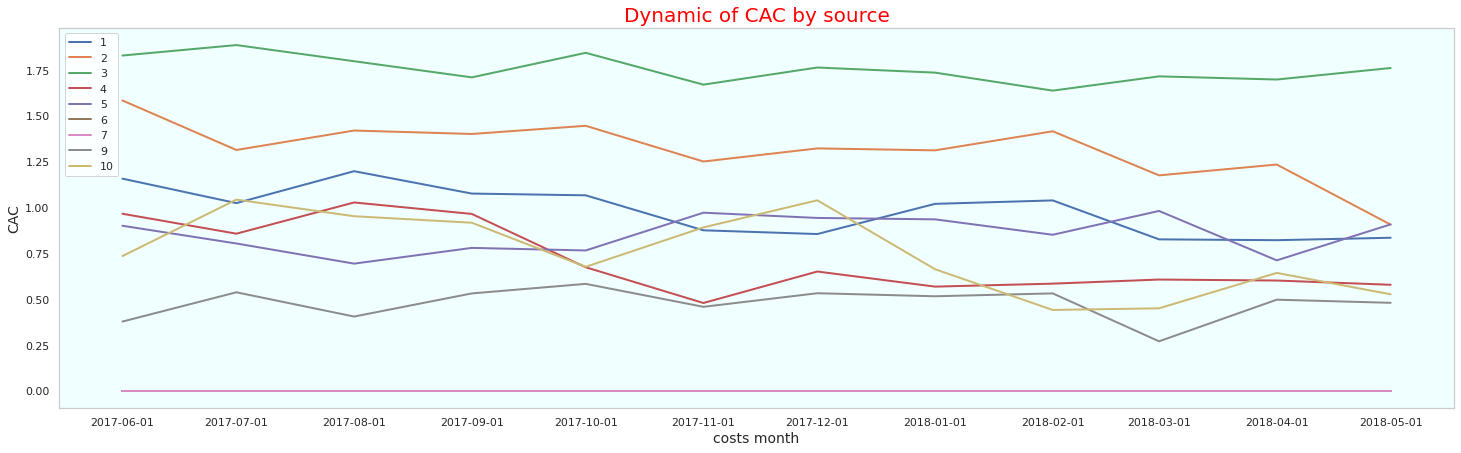

In [94]:
fig, ax = plt.subplots(figsize=(25, 7))
ax.title.set_text('Dynamic of CAC by source')
for i in cac_pivot.columns:
    data=cac_pivot[i]
    ax.plot(data,linewidth=2,label=data.name)
ax.set_xticks(data.index)
ax.set_ylabel('CAC',fontsize=14)
ax.set_xlabel("costs month",fontsize=14)
ax_beautify(ax)

Визуально наибольшей волатильностью отличается CAC для источника трафика №10.



---



Для рассчета окупаемости маркетинговых расходов (Return on Marketing Investment или сокращенно ROMI) по когортам в разрезе источников создадим синтетический индекс в таблицах визитов и CAC по источникам: месяц первого перехода + источник трафика.

In [95]:
visits_new=visits[['uid','device','source_id','session_month','first_visit_month']]
visits_new['source_fvm']=visits_new['first_visit_month'].astype('str') + ' ' + visits_new['source_id'].astype('str')
cac_month_source=cac_month_source.reset_index()
cac_month_source['source_fvm']=cac_month_source['costs_month'].astype('str') + ' ' + cac_month_source['source_id'].astype('str')

Рассчитаем количество уникальных юзеров по месяцу и источнику перехода.

In [96]:
source_cohorts_nbuyers=visits_new.groupby('source_fvm').agg({'uid':'nunique'}).reset_index()
source_cohorts_nbuyers.columns = ['source_fvm', 'n_buyers']

Сохраним в переменной source_cohorts_uid идентификаторы пользователей и месяц/источник первого перехода.

In [97]:
source_cohorts_uid=visits_new[['uid','source_fvm']].drop_duplicates()

Для расчета LTV по источникам трафика добавим в таблицу заказов по уникальному идентификатору пользователей данные о месяце/источнике первого перехода.

In [98]:
orders_by_source=orders.merge(source_cohorts_uid,on='uid')

Сформируем когорты (не младше 6 месяцев) по source_fvm и рассчитаем по ним суммарную выручку.

In [99]:
edge_month=pd.to_datetime('2017-11-01')
source_cohorts=(
    orders_by_source.query('first_order_month	<= @edge_month').groupby(['source_fvm','first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

Добавим в таблицу source_cohorts информацию о количестве пользователей в каждой когорте и рассчитаем lifetime.

In [100]:
report = pd.merge(source_cohorts, source_cohorts_nbuyers, on='source_fvm')
report['gp'] = report['revenue']
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

Рассчитаем LTV по источникам трафика:

In [101]:
report['ltv'] = report['gp'] / report['n_buyers']

Соединим таблицы, содержащие информацию об LTV и CAC по источникам.

In [102]:
report_new=report.merge(cac_month_source[['cac','source_fvm']],on='source_fvm')

Разгруппируем синтетический индекс месяц/источник первого перехода для извлечения source_id.

In [103]:
f = lambda x: x['source_fvm'].split(' ')[0]
report_new['first_visit_month']= report_new.apply(f, axis=1)
f = lambda x: x['source_fvm'].split(' ')[1]
report_new['source_id']= report_new.apply(f, axis=1)

Рассчитаем ROMI по источникам трафика.

In [104]:
f = lambda x: x['ltv']/x['cac'] if x['cac']!=0 else 0
report_new['romi']= report_new.apply(f, axis=1)

Создадим сводную таблицу, отражающую изменение окупаемости маркетинговых инвестиций по источникам трафика в зависимости от возраста когорт.

In [110]:
output = report_new.pivot_table(index='source_id', columns='age', values='romi', aggfunc='mean')
output=output.cumsum(axis=1).round(2).fillna(0)
def highlight_over(s):
    is_max = s >= 1
    return ['background-color: lightgreen' if v else '' for v in is_max]
output.style.apply(highlight_over)

age,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.70,0.90,1.04,1.45,1.58,1.70,1.85,1.96,2.08,2.25,2.50,2.75
10,0.28,0.33,0.38,0.42,0.47,0.50,0.53,0.55,0.62,0.72,0.99,1.54
2,0.38,0.49,0.56,0.78,0.85,0.91,0.99,1.05,1.12,1.21,1.34,1.47
3,0.16,0.18,0.20,0.27,0.29,0.31,0.33,0.35,0.37,0.40,0.44,0.47
4,0.35,0.40,0.44,0.56,0.61,0.65,0.70,0.74,0.78,0.85,0.94,1.05
5,0.35,0.41,0.46,0.63,0.69,0.75,0.82,0.87,0.94,1.02,1.14,1.28
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.82,0.98,1.10,1.19,1.26,1.31,1.38,1.45,1.62,1.77,1.95,2.17


In [106]:
output_fvm = report_new.pivot_table(index='first_visit_month', columns='age', values='romi', aggfunc='mean')
output_fvm=output_fvm.round(2).fillna(0).cumsum(axis=1)
output_fvm.style.apply(highlight_over)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,0.34,0.46,0.58,0.71,0.83,0.92,1.08,1.16,1.28,1.43,1.65,1.85
2017-07-01,0.32,0.37,0.41,0.44,0.46,0.47,0.49,0.52,0.59,0.63,0.65,0.65
2017-08-01,0.34,0.39,0.43,0.48,0.54,0.57,0.60,0.69,0.72,0.77,0.77,0.77
2017-09-01,0.50,0.66,0.73,1.46,1.52,1.69,1.74,1.78,1.83,1.83,1.83,1.83
2017-10-01,0.69,0.81,0.85,0.89,0.92,0.94,0.96,1.00,1.00,1.00,1.00,1.00
2017-11-01,1.22,1.34,1.40,1.47,1.50,1.52,1.54,1.54,1.54,1.54,1.54,1.54


In [107]:
sources=report_new['source_id'].unique()
for i in sources:
    print('\033[1m', 'Когортная матрица ROMI для источника: ', i,'\n', '\033[0m')
    output = report_new.query('source_id == @i').pivot_table(index='first_visit_month', columns='age', values='romi', aggfunc='mean')
    print(output.cumsum(axis=1).round(2).fillna(0),'\n')

 Когортная матрица ROMI для источника:  1 
 
age                  0     1     2     3     4     5     6     7     8     9     10    11
first_visit_month                                                                        
2017-06-01         0.49  0.70  0.91  1.18  1.42  1.60  1.93  2.12  2.32  2.57  2.93  3.18
2017-07-01         0.55  0.63  0.70  0.76  0.79  0.80  0.83  0.87  0.96  1.00  1.06  0.00
2017-08-01         0.47  0.57  0.67  0.76  0.88  0.95  1.01  1.16  1.22  1.34  0.00  0.00
2017-09-01         0.95  1.39  1.58  3.58  3.74  4.15  4.28  4.34  4.36  0.00  0.00  0.00
2017-10-01         1.16  1.42  1.51  1.61  1.68  1.72  1.75  1.84  0.00  0.00  0.00  0.00
2017-11-01         2.03  2.30  2.45  2.63  2.70  2.72  2.77  0.00  0.00  0.00  0.00  0.00 

 Когортная матрица ROMI для источника:  10 
 
age                  0     1     2     3     4     5     6     7     8     9     10    11
first_visit_month                                                                        
2017-06

Визуализируем возврат вложений в маркетинг на графике.

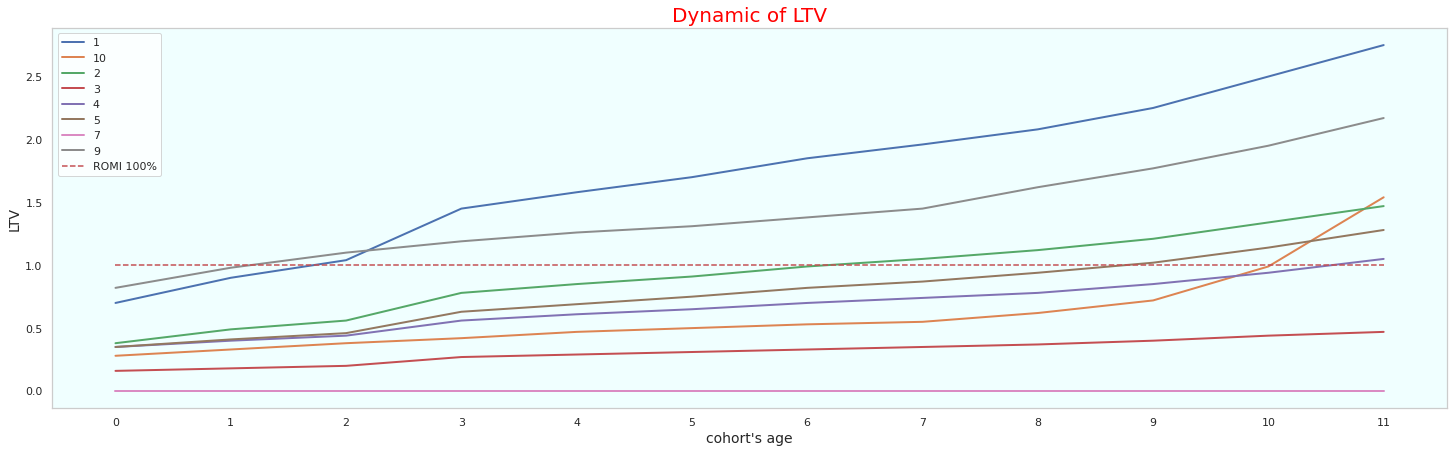

In [111]:
fig, ax = plt.subplots(figsize=(25, 7))
ax.title.set_text('Dynamic of LTV')
for i in output.index:
    data=output.loc[i]
    ax.plot(data,linewidth=2,label=data.name)
horiz_line_data = [x for x in range(12)]
ax.plot(horiz_line_data,[1]*12, 'r--',label='ROMI 100%')
ax.set_xticks(data.index)
ax.set_ylabel('LTV',fontsize=14)
ax.set_xlabel("cohort's age",fontsize=14)
ax_beautify(ax)

График показывает, что быстрее всего окупаются вложения в привлечение клиентов по каналам №1 и №9 (за 1-2 месяца).



---



## **Выводы и рекомендации**<a class="anchor" id="summary"></a>

5.1. На источники под номерами 1, 2, 3, 4, 5 приходится 93,5%  всего трафика и 96,5% бюджета на маркетинг. Самым мощным является канал 4, генерирующий 28,3% трафика и поглощающий 18,6 % затрат на рекламу, которые окупаются за 11-12 месяцев. Канал номер 3, аккумулирующий 42,9% маркетингового бюджета, обеспечивает 23,8% трафика, а рекламные вложения в него не окупаются за год (ROMI за 12 месяцев — 0,47).

С точки зрения окупаемости затрат на маркетинг лидируют каналы 1 и 9, приносящие 13,2% трафика и получающие 8% расходов на рекламу, которые окупаются за 1-2 месяца.
Можно порекомендовать перераспределить часть бюджета, приходящегося на канал №3, на  каналы 2 и 5 суммарно генерирующие 31,9% трафика и имеющие годовой ROMI на уровне 1,28-1,47.

5.2. Сервис Яндекс.Афиша пользуется популярностью, о чем свидетельствует высокий показатель количества активных пользователей в день — более 900 человек. Типичным является следующее поведение нового пользователя: человек заходит на сайт, посвящает поиску и изучению информации от 5 до 10 минут, завершает сессию и принимает решение о покупке в течение последующих двух дней. Далее этот покупатель делает по одной покупке раз в квартал.

При довольно высоком соотношении числа посетителей сайта и покупателей из их числа (16%) и конверсии визитов в заказы (14%), коэффициент удержания пользователей довольно низок. Он составляет от 0 до 9% в первый месяц, и от 2 до 6,2% по истечение полугода с даты первой покупки. Скорее всего, это связано со спецификой потребления продукта — развлекательных мероприятий, имеющей, в основном, спонтанную природу.

Таким образом, для Яндекс.Афиши приоритетным направлением маркетинговых инвестиций, скорее всего, будет являться увеличение числа новых пользователей в ущерб повышению Retention rate.

5.3. По результатам когортного анализа самыми устойчивыми когортами можно признать группы пользователей совершившие первый визит на сайт Яндекс.Афиши в июне и июле 2017 года: их retention rate довольно стабилен на протяжении всего исследуемого периода и не падает ниже 4%. Это при учете того, что пользователи, привлеченные в июле 2017 года, продемострировали самый низкий отклик на рекламную компанию  (ROMI за 12 месяцев — 0,65). 

У когорт позднего формирования происходит планомерное снижение коэффициента удержания уже после 2-4 месяца «жизни» на сервисе.